# Multifit
Example showing how to fit in a sub-range of an histogram
An histogram is created and filled with the bin contents and errors
defined in the table below.
3 gaussians are fitted in sub-ranges of this histogram.
A new function (a sum of 3 gaussians) is fitted on another subrange
Note that when fitting simple functions, such as gaussians, the initial
values of parameters are automatically computed by ROOT.
In the more complicated case of the sum of 3 gaussians, the initial values
of parameters must be given. In this particular case, the initial values
are taken from the result of the individual fits.




**Author:** Wim Lavrijsen  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:29 AM.</small></i>

In [1]:
from ROOT import TH1F, TF1
from ROOT import gROOT
from array import array

x = ( 1.913521, 1.953769, 2.347435, 2.883654, 3.493567,
      4.047560, 4.337210, 4.364347, 4.563004, 5.054247,
      5.194183, 5.380521, 5.303213, 5.384578, 5.563983,
      5.728500, 5.685752, 5.080029, 4.251809, 3.372246,
      2.207432, 1.227541, 0.8597788,0.8220503,0.8046592,
      0.7684097,0.7469761,0.8019787,0.8362375,0.8744895,
      0.9143721,0.9462768,0.9285364,0.8954604,0.8410891,
      0.7853871,0.7100883,0.6938808,0.7363682,0.7032954,
      0.6029015,0.5600163,0.7477068,1.188785, 1.938228,
      2.602717, 3.472962, 4.465014, 5.177035 )

np = len(x)
h = TH1F( 'h', 'Example of several fits in subranges', np, 85, 134 )
h.SetMaximum( 7 )

for i in range(np):
   h.SetBinContent( i+1, x[i] )

par = array( 'd', 9*[0.] )
g1 = TF1( 'g1', 'gaus',  85,  95 )
g2 = TF1( 'g2', 'gaus',  98, 108 )
g3 = TF1( 'g3', 'gaus', 110, 121 )

total = TF1( 'total', 'gaus(0)+gaus(3)+gaus(6)', 85, 125 )
total.SetLineColor( 2 )
h.Fit( g1, 'R' )
h.Fit( g2, 'R+' )
h.Fit( g3, 'R+' )

par1 = g1.GetParameters()
par2 = g2.GetParameters()
par3 = g3.GetParameters()

par[0], par[1], par[2] = par1[0], par1[1], par1[2]
par[3], par[4], par[5] = par2[0], par2[1], par2[2]
par[6], par[7], par[8] = par3[0], par3[1], par3[2]

total.SetParameters( par )
h.Fit( total, 'R+' )

Welcome to JupyROOT 6.18/03


Draw all canvases 

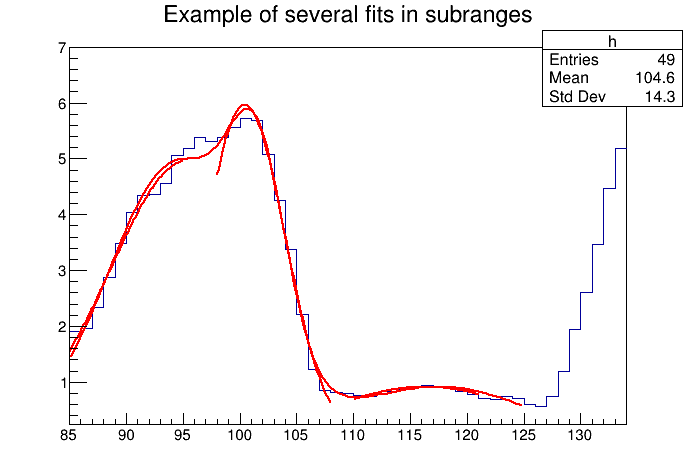

In [2]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()